# Explore feature-to-feature relationship in Boston

In [1]:
import pandas as pd
from sklearn import datasets
import discover

In [2]:
examlpe_dataset = datasets.load_boston()
df_boston = pd.DataFrame(examlpe_dataset.data, columns=examlpe_dataset.feature_names)
df_boston['target'] = examlpe_dataset.target

df = df_boston
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target']
classifier_overrides = set()

df = df_boston
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df_results = discover.discover(cols, classifier_overrides, df)

In [5]:
df_results.pivot(index='target', columns='feature', values='score').fillna(1) \
.style.background_gradient(cmap="viridis", low=0.7, axis=1) \
.set_precision(2)

feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,target
target,,,,,,,,,,,,,,
AGE,1,-0.083,0.0084,0.081,0.51,0.66,0.13,0.68,0.56,0.26,-0.42,0.57,0.3,0.068
B,-0.17,1,-0.014,0.18,-0.00076,0.25,-0.39,0.53,0.22,0.24,-0.38,0.24,0.037,-0.21
CHAS,-0.47,-0.3,1,-0.82,-0.45,0.098,-0.76,0.12,-0.068,-0.064,-0.65,0.12,0.033,-0.43
CRIM,0.027,0.14,0.00087,1,0.12,0.46,0.098,0.58,0.43,0.45,-0.92,0.47,0.057,0.034
DIS,0.32,0.015,0.0045,0.2,1,0.84,-0.074,0.87,0.6,0.33,-0.32,0.8,0.57,-0.09
INDUS,0.23,-0.04,0.0078,0.17,0.51,1,0.14,0.95,0.78,0.47,-0.24,0.9,0.34,-0.0014
LSTAT,0.14,-0.14,-0.016,0.21,0.14,0.44,1,0.55,0.33,0.32,0.13,0.37,0.13,0.55
NOX,0.38,0.069,0.012,0.51,0.6,0.81,0.0096,1,0.69,0.39,-0.42,0.77,0.29,0.17
PTRATIO,-0.43,-0.36,0.034,-0.34,-0.25,0.78,-0.28,0.84,1,0.36,-0.41,0.7,0.2,-0.077


(0, 10)

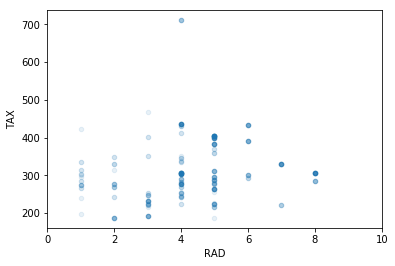

In [15]:
ax = df.plot(kind="scatter", x="RAD", y="TAX", alpha=0.1);
ax.set_xlim(0, 10) # ignore an outlier

(0, 10)

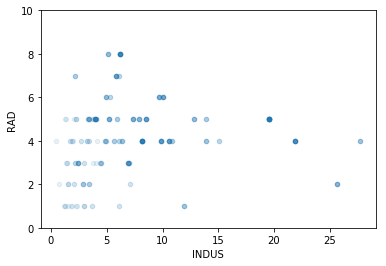

In [13]:
ax = df.plot(kind="scatter", x="INDUS", y="RAD", alpha=0.1);
ax.set_ylim(0, 10) # ignore 1 high potential outlier

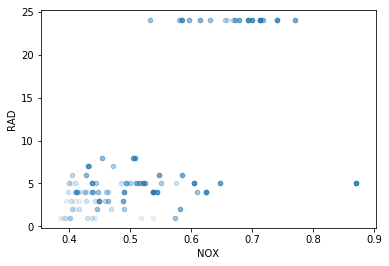

In [14]:
df.plot(kind="scatter", x="NOX", y="RAD", alpha=0.1);